### Imports & Options

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import random
import pickle
from copy import copy

In [4]:
from PIL import Image, ImageDraw
from rtree import index
import networkx as nx
import matplotlib.pyplot as plt

In [5]:
import sys
sys.path.append("../src")

In [8]:
from stippling import Stipple
from optimize import Optimize

# from ant_manager import Optimize
# from ant import Ant
# from plotting_tools import Analyze
# from utils import window

### Stippling

In [10]:
filename = "../images/ame.png"
lite_stippling = Stipple(original_filename = filename)
lite_stippling.place_dots(20)

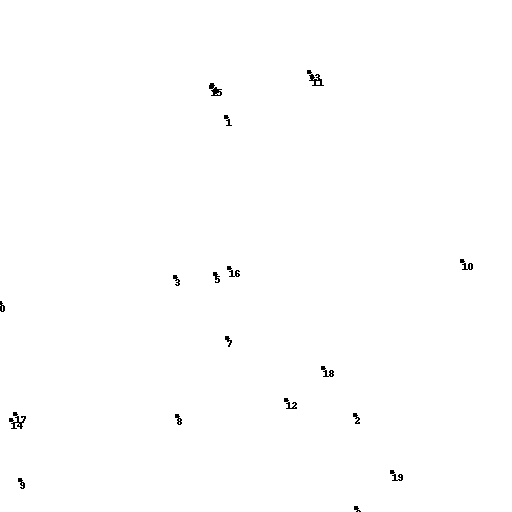

In [11]:
lite_stippling.draw_points(radius=2, include_ids=True)

### Ants

**Notes**
* On a graph of 20 nodes there are 190 edges.

In [17]:
optimization = Optimize(lite_stippling.chosen_points, 
                        num_ants=20, 
                        evaporation_rate=0.5, 
                        alpha=0.2,
                        deposition_factor=6000)

The graph has 20 nodes and 190 edges.


In [18]:
optimization.optimize(num_iterations=500)
# analyze = Analyze(optimization)

The solver has "converged".
The ants are following 3 differnt path(s).


AttributeError: 'Analyze' object has no attribute 'iteration_count'

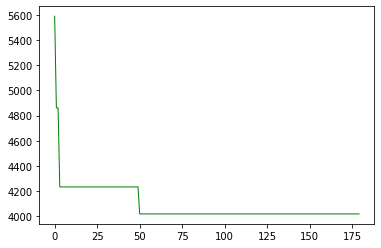

In [276]:
analyze.plot_convergence()

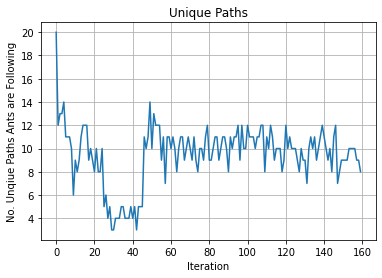

In [266]:
optimization.plot_unique_paths()

In [254]:
optimization.plot_greediness()

AttributeError: 'Optimize' object has no attribute 'fastest_ants'

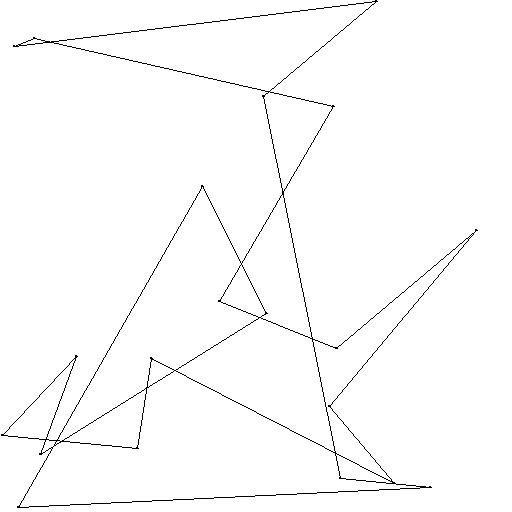

In [267]:
plot_path(optimization)

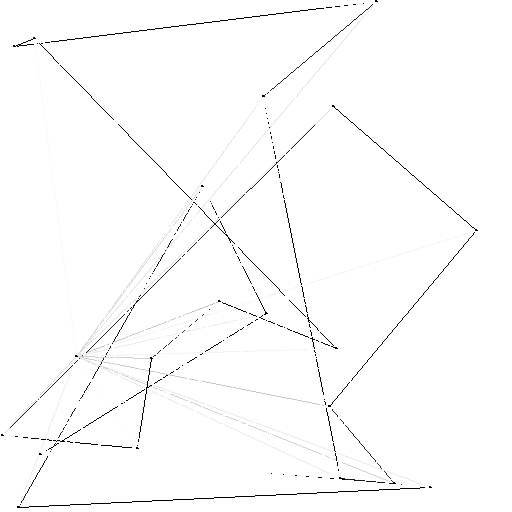

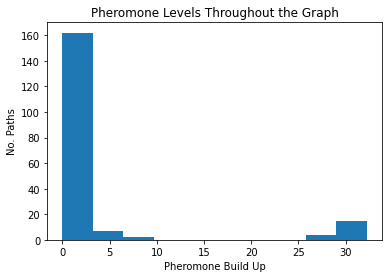

In [268]:
plot_graph(optimization, show_pheromone=True)